In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [4]:
train_dataset = pd.read_csv("Titanic-dataset.csv")


In [6]:
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
def bar_plot(variable):
    var = train_dataset[variable]
    var_value = var.value_counts()

    plt.figure(figsize = (9,3))
    plt.bar(var_value.index, var_value)
    plt.xticks(var_value.index, var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, var_value))

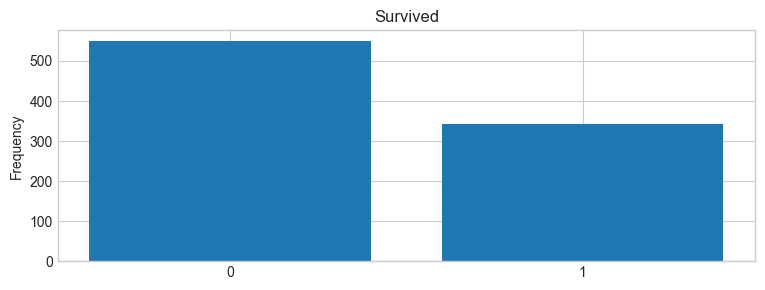

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


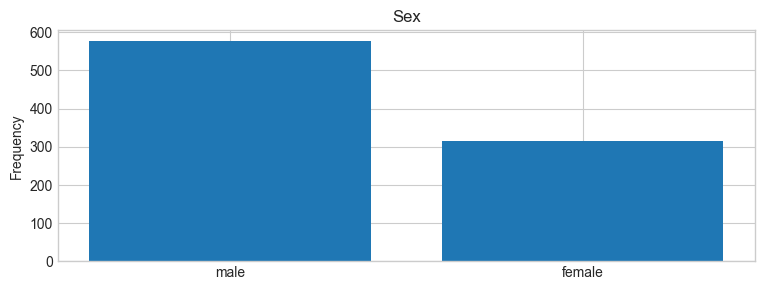

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


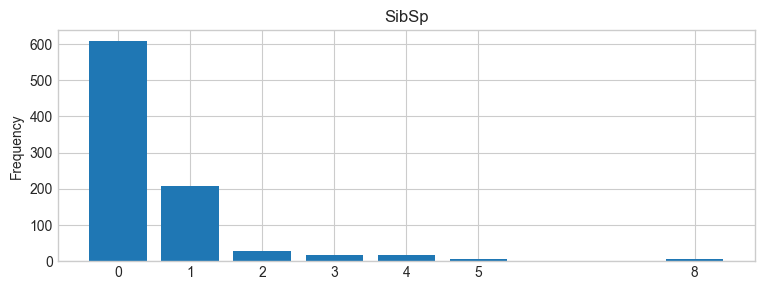

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


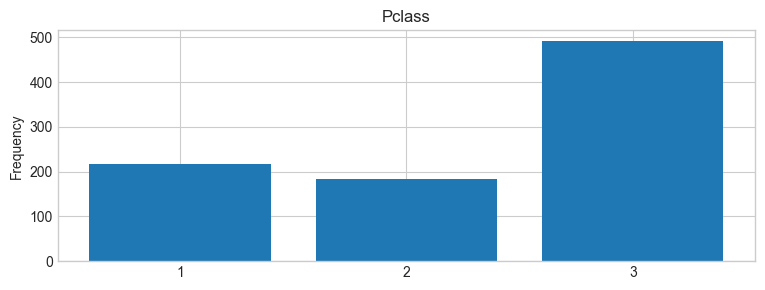

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


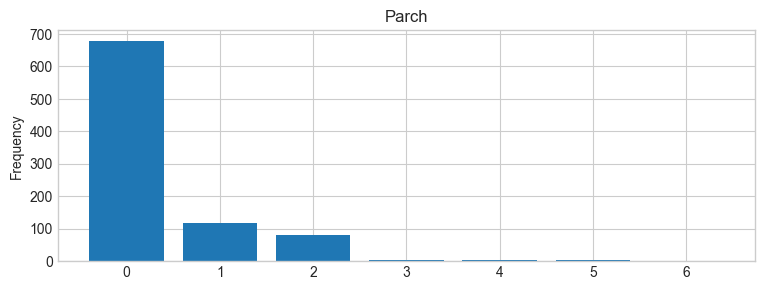

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


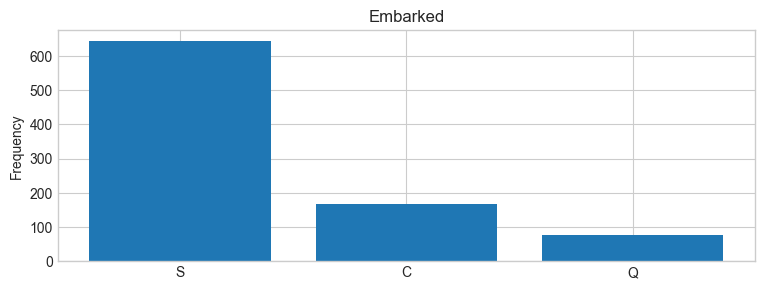

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [18]:
category_1 = ["Survived", 'Sex', "SibSp", "Pclass", "Parch", "Embarked"]
for c in category_1:
    bar_plot(c)
            

In [26]:
category_2 = ["Cabin", "Name", "Ticket"]
for i in category_2:
    print("{}: \n".format(train_dataset[i].value_counts()))
    

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64: 

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64: 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64: 



In [36]:
def plot_hist(variable):
    plt.figure(figsize=(9, 3))
    plt.hist(train_dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    print("{} distribution with hist".format(variable))
    plt.show()    

Fare distribution with hist


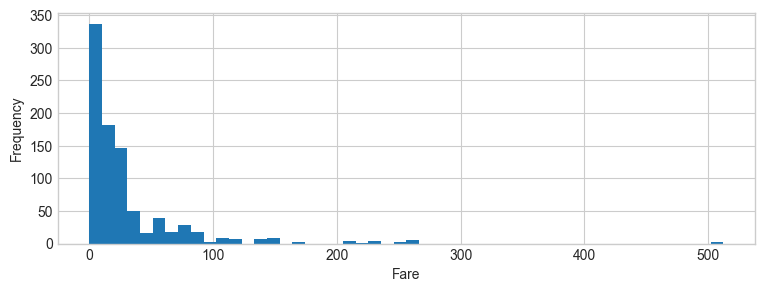

Age distribution with hist


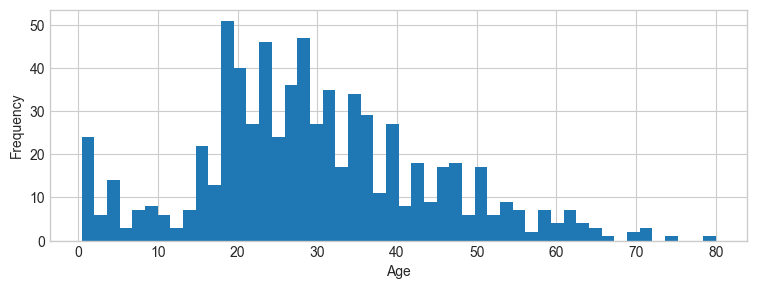

PassengerId distribution with hist


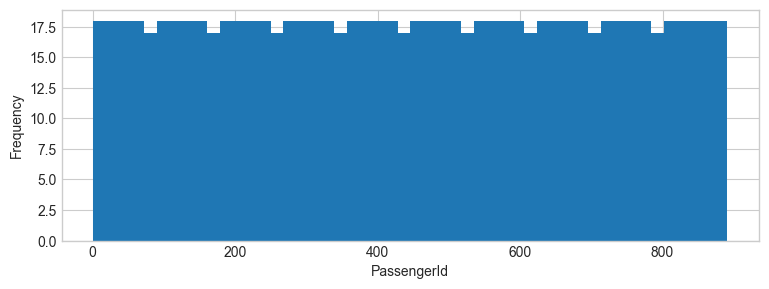

In [38]:
numeric_var = ["Fare", "Age", "PassengerId"]
for i in numeric_var:
    plot_hist(i)

In [42]:
train_dataset[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [44]:
train_dataset[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [46]:
train_dataset[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [48]:
train_dataset[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [64]:
def detect_outlier(df, features):
    outliers = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)

        IQR = Q3 - Q1

        outlier_step = IQR * 1.5

        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outliers.extend(outlier_list_col)
    outliers = Counter(outliers)
    multiple_outliers = list(i for i, v in outliers.items() if v > 2)
    
    return multiple_outliers

In [66]:
train_dataset.loc[detect_outlier(train_dataset,["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [68]:
train_dataset = train_dataset.drop(detect_outlier(train_dataset,["Age", "SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop=True)

In [70]:
train_dataset_len = len(train_dataset)

In [72]:
train_dataset.columns[train_dataset.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [75]:
train_dataset[train_dataset["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


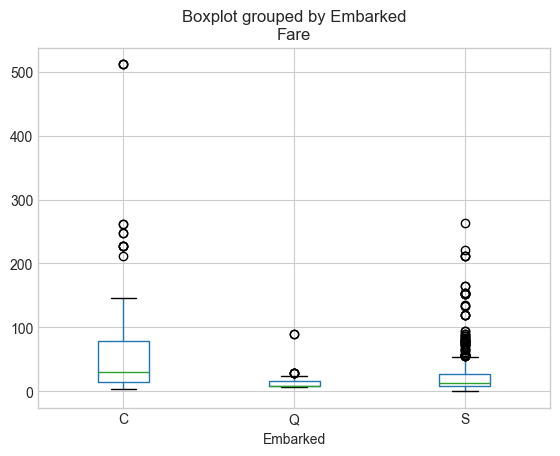

In [77]:
train_dataset.boxplot(column = "Fare", by = "Embarked")
plt.show()

In [79]:
train_dataset["Embarked"] = train_dataset["Embarked"].fillna("C")
train_dataset[train_dataset["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [81]:
train_dataset[train_dataset["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [83]:
train_dataset["Fare"] = train_dataset["Fare"].fillna(np.mean(train_dataset[train_dataset["Pclass"] == 3]["Fare"]))

In [85]:
train_dataset[train_dataset["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


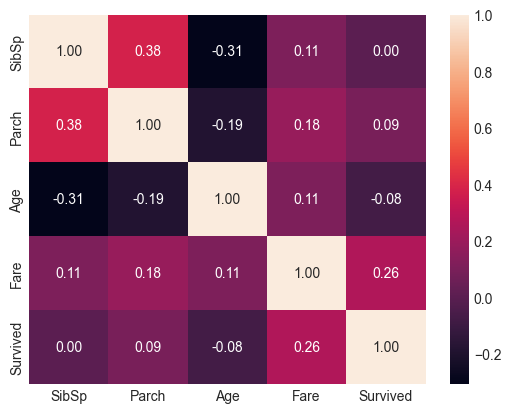

In [87]:
list_1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_dataset[list_1].corr(), annot=True, fmt = ".2f")
plt.show()

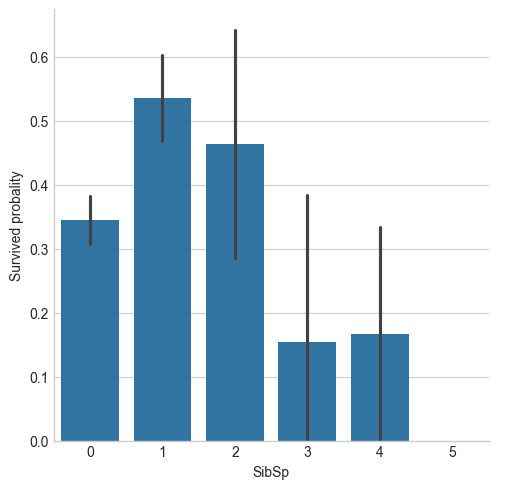

In [93]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train_dataset, kind = "bar")
g.set_ylabels("Survived probality")
plt.show()

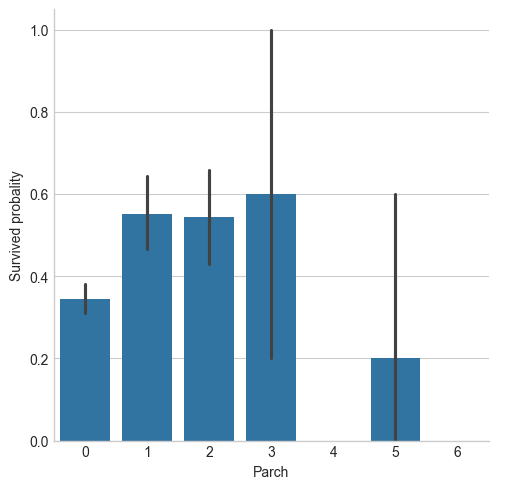

In [95]:
g = sns.catplot(x = "Parch", y = "Survived", data = train_dataset, kind = "bar")
g.set_ylabels("Survived probality")
plt.show()

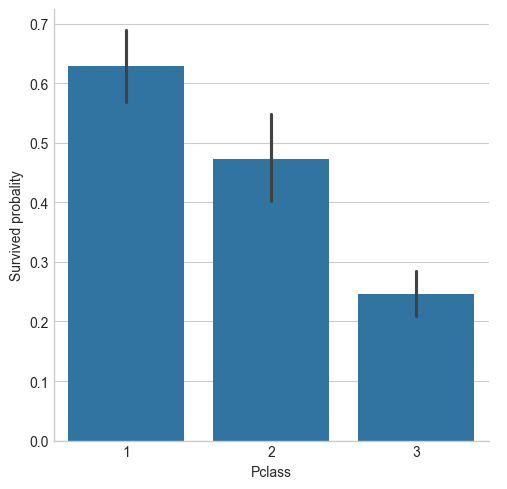

In [97]:
g = sns.catplot(x = "Pclass", y = "Survived", data = train_dataset, kind = "bar")
g.set_ylabels("Survived probality")
plt.show()

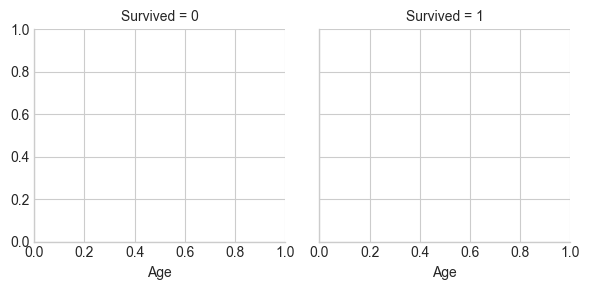

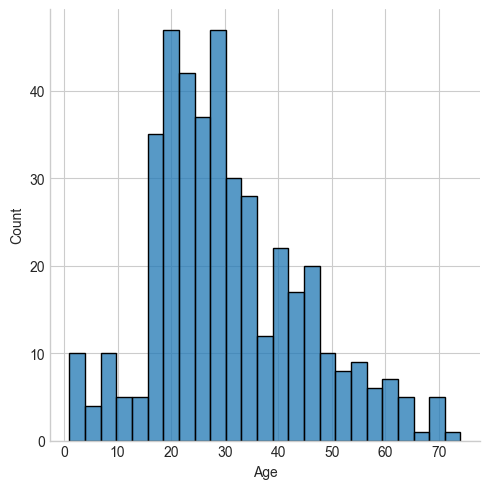

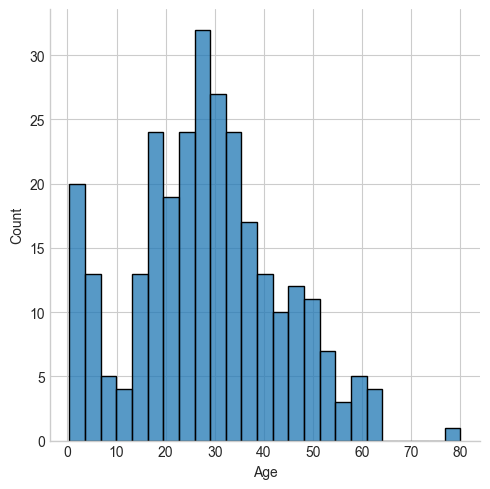

In [101]:
g = sns.FacetGrid(train_dataset, col = "Survived")
g.map(sns.displot, "Age", bins = 25)
plt.show()

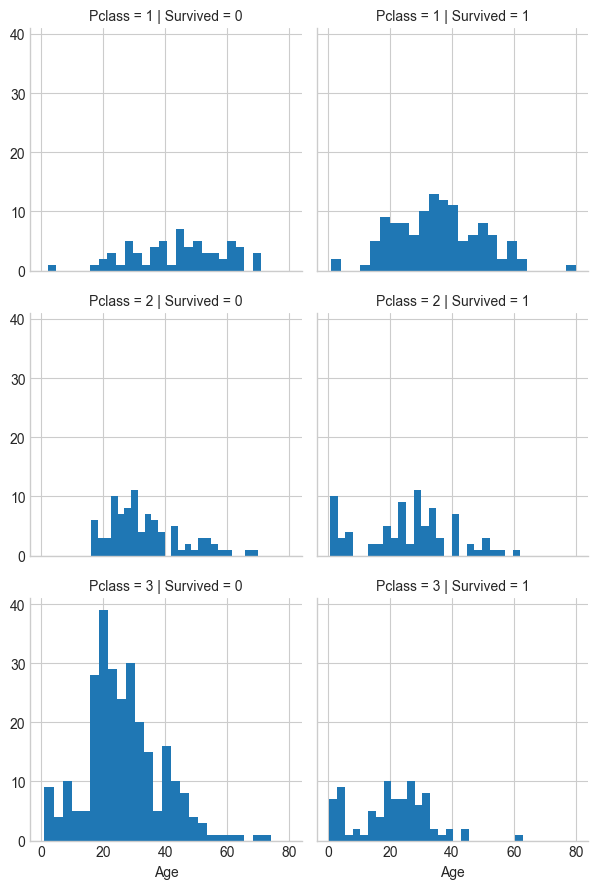

In [109]:
g = sns.FacetGrid(train_dataset, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

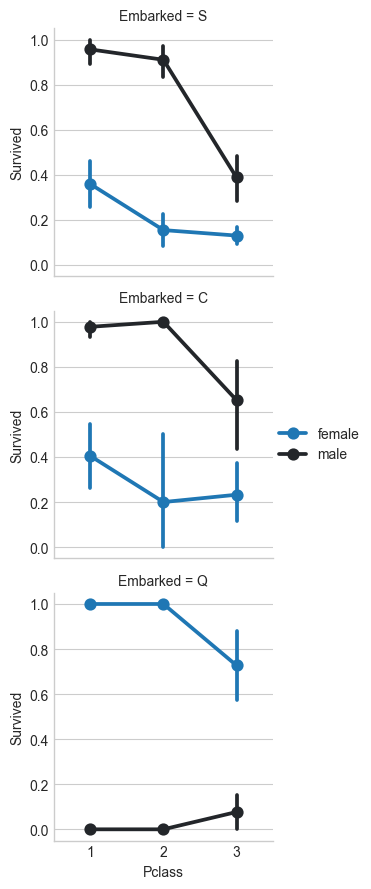

In [111]:
g = sns.FacetGrid(train_dataset,row = "Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

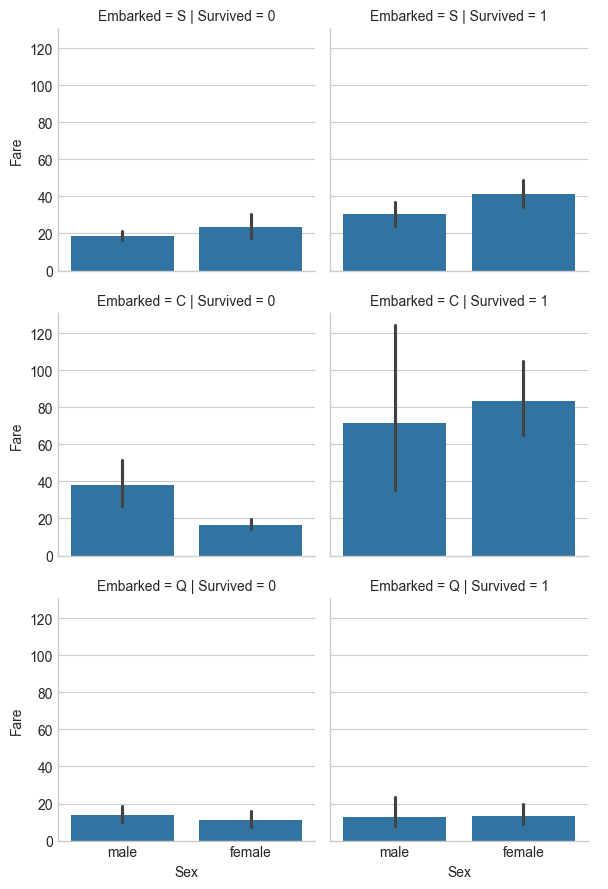

In [113]:
g = sns.FacetGrid(train_dataset,row = "Embarked", col = "Survived")
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

In [115]:
train_dataset[train_dataset["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


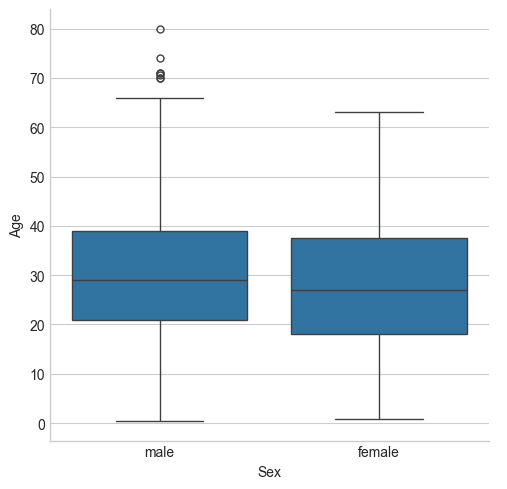

In [117]:
g = sns.catplot(x = "Sex", y = "Age", data = train_dataset, kind = "box")
plt.show()

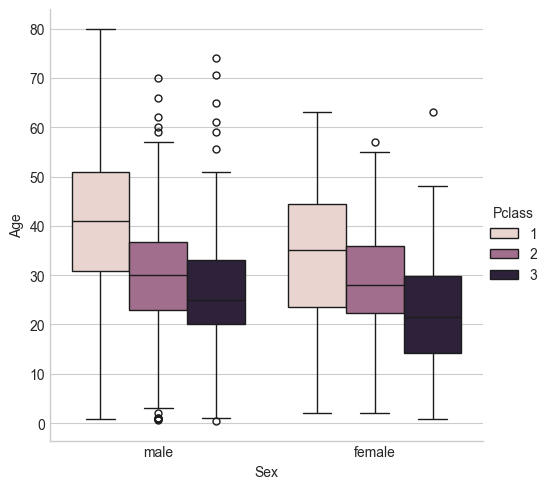

In [119]:
g = sns.catplot(x = "Sex", y = "Age", hue = "Pclass", data = train_dataset, kind = "box")
plt.show()

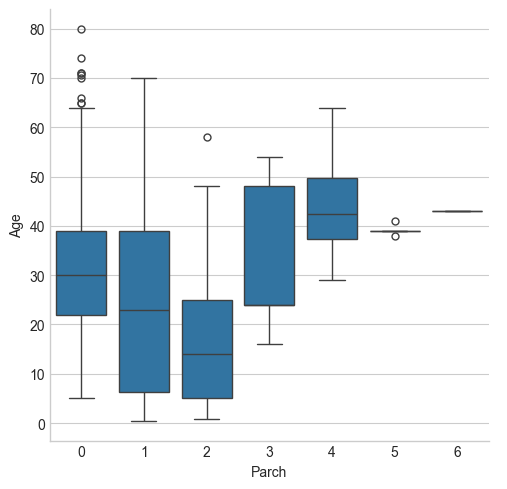

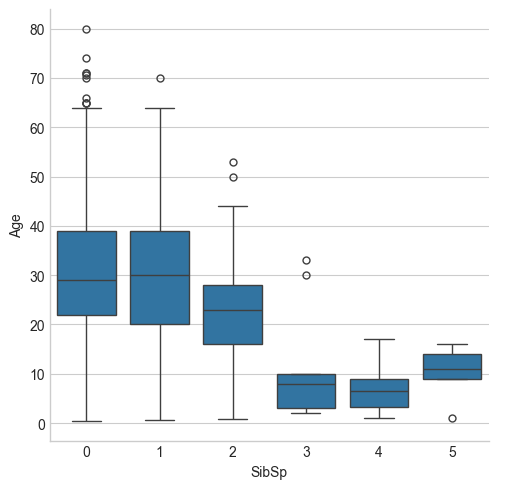

In [121]:
g = sns.catplot(x = "Parch", y = "Age", data = train_dataset, kind = "box")
g = sns.catplot(x = "SibSp", y = "Age", data = train_dataset, kind = "box")
plt.show()

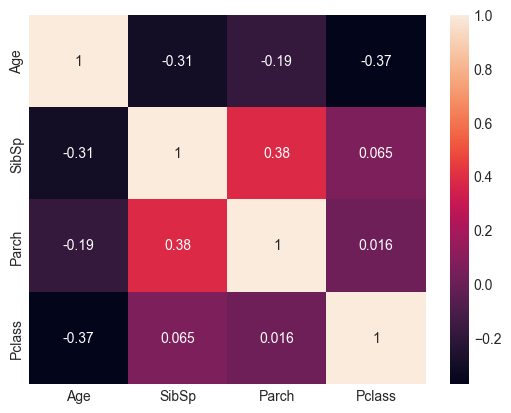

In [131]:
list_2 = ["Age", "SibSp", "Parch", "Pclass"]
sns.heatmap(train_dataset[list_2].corr(), annot=True)
plt.show()

In [139]:
nan_age_in = list(train_dataset["Age"][train_dataset["Age"].isnull()].index)
for n in nan_age_in:
    age_pred = train_dataset["Age"][((train_dataset['SibSp'] == train_dataset.iloc[n]["SibSp"]) & (train_dataset['Parch'] == train_dataset.iloc[n]["Parch"]) & (train_dataset['Pclass'] == train_dataset.iloc[n]["Pclass"]))].median()
    age_median = train_dataset["Age"].median()
    if not np.isnan(age_pred):
        train_dataset["Age"].iloc[n] = age_pred
    else:
        train_dataset["Age"].iloc[n] = age_median

In [141]:
train_dataset[train_dataset["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [143]:
train_dataset["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [147]:
name = train_dataset["Name"]
train_dataset["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [149]:
train_dataset["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

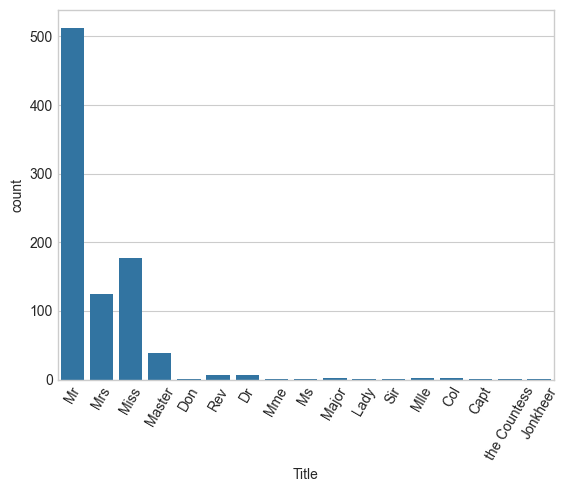

In [151]:
sns.countplot(x = "Title", data = train_dataset)
plt.xticks(rotation=60)
plt.show()

In [155]:
train_dataset["Title"] = train_dataset["Title"].replace(["Lady", "The Countess", "Jonkheer", "Cap", "Col", "Don", "Dr", "Major", "Rev", "Sir"], "other")
train_dataset["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_dataset["Title"]]
train_dataset["Title"].head(10)

0    2
1    1
2    1
3    1
4    2
5    2
6    2
7    0
8    1
9    1
Name: Title, dtype: int64

In [157]:
train_dataset["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

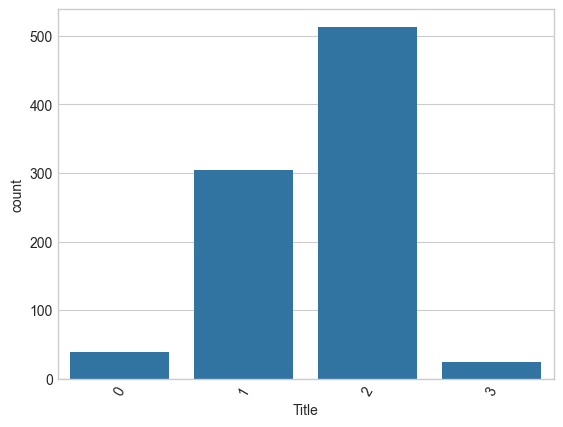

In [159]:
sns.countplot(x = "Title", data = train_dataset)
plt.xticks(rotation=60)
plt.show()

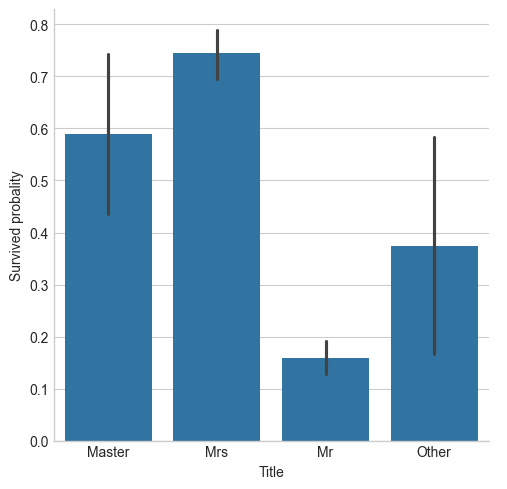

In [165]:
g = sns.catplot(x = "Title", y = "Survived", data = train_dataset, kind = "bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Survived probality")
plt.show()

In [169]:
train_dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [171]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [173]:
train_dataset = pd.get_dummies(train_dataset, columns = ["Title"])
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [223]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


In [177]:
train_dataset["Fsize"] = train_dataset["SibSp"] + train_dataset["Parch"] + 1

In [179]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


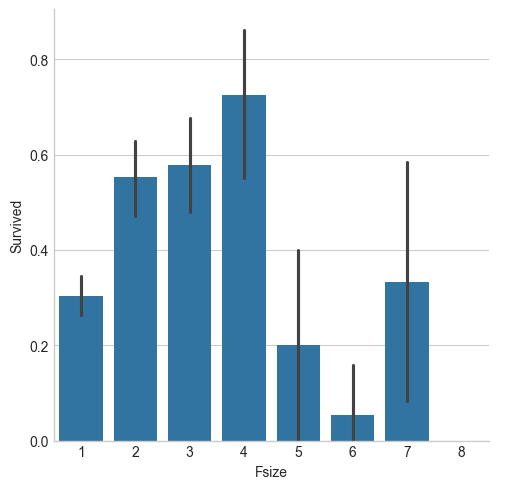

In [181]:
g = sns.catplot(x = "Fsize", y = "Survived", data = train_dataset, kind = "bar")
g.set_ylabels("Survived")
plt.show()

In [225]:
train_dataset["Family_size"] = [1 if i < 5 else 0 for i in train_dataset["Fsize"]]

In [227]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
5,6,0,3,male,26.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,1
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,0
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,1
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,1


<function matplotlib.pyplot.show(close=None, block=None)>

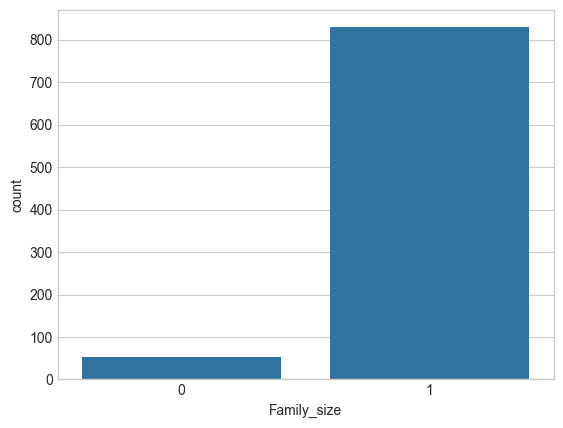

In [229]:
sns.countplot(x = "Family_size", data = train_dataset)
plt.show

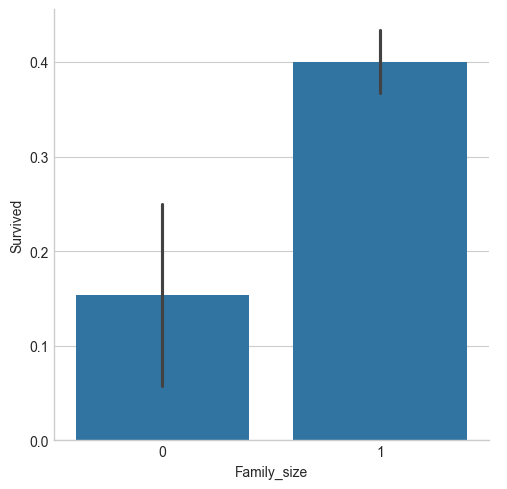

In [231]:
g = sns.catplot(x = "Family_size", y = "Survived", data = train_dataset, kind = "bar")
g.set_ylabels("Survived")
plt.show()

In [233]:
train_dataset = pd.get_dummies(train_dataset, columns = ["Family_size"])


In [235]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True
5,6,0,3,male,26.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,False,True
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,False,True
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,True,False
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,False,True
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,False,True


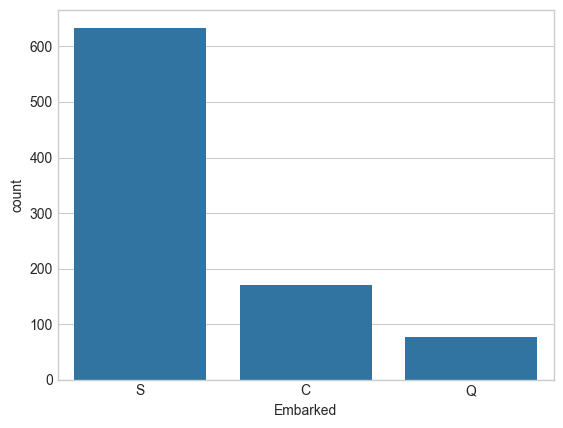

In [237]:
sns.countplot(x = "Embarked", data = train_dataset)
plt.show()

In [239]:
train_dataset = pd.get_dummies(train_dataset, columns = ["Embarked"])

In [241]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True
5,6,0,3,male,26.0,0,0,330877,8.4583,NaN,False,False,True,False,1,False,True,False,True,False
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,False,False,True,False,1,False,True,False,False,True
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,True,False,False,False,5,True,False,False,False,True
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,False,True,False,False,3,False,True,False,False,True
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,False,True,False,False,2,False,True,True,False,False


In [243]:
train_dataset["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [245]:
ex = "A/5. 2151"
ex.replace(".", "").replace("/", "").strip().split(" ")[0]

'A5'

In [247]:
tickets = []
for i in list(train_dataset.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".", "").replace("/", "").strip().split(" ")[0])
    else:
        tickets.append("x")
train_dataset["Ticket"] = tickets

In [253]:
train_dataset["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [261]:
train_dataset = pd.get_dummies(train_dataset, columns = ["Ticket"], prefix = "T")

In [263]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True


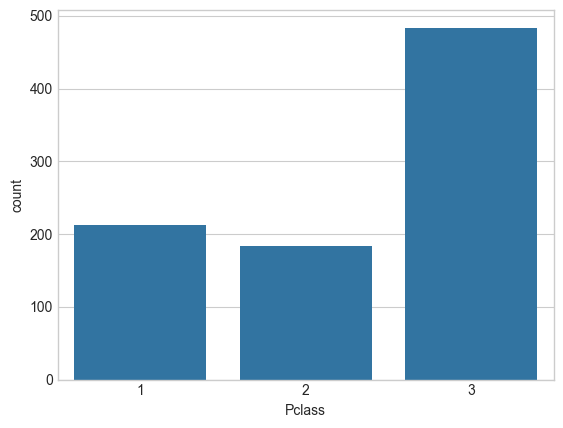

In [265]:
sns.countplot(x = "Pclass", data = train_dataset)
plt.show()

In [267]:
train_dataset["Pclass"] = train_dataset["Pclass"].astype("category")
train_dataset = pd.get_dummies(train_dataset, columns = ["Pclass"])

In [269]:
train_dataset.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,female,26.0,0,0,7.9250,NaN,False,True,...,False,False,True,False,False,False,False,False,False,True
3,4,1,female,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0,male,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


In [271]:
train_dataset["Sex"] = train_dataset["Sex"].astype("category")
train_dataset = pd.get_dummies(train_dataset, columns = ["Sex"])

In [273]:
train_dataset.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1,26.0,0,0,7.9250,NaN,False,True,False,...,True,False,False,False,False,False,False,True,True,False
3,4,1,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


In [278]:
train_dataset.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [280]:
train_dataset.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'Family_size_0', 'Family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A4', 'T_A5', 'T_AS', 'T_C',
       'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP',
       'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis',
       'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [282]:
train_dataset.drop(labels = ["Fsize"], axis = 1, inplace = True)

In [284]:
train_dataset.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Family_size_0', 'Family_size_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA',
       'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP',
       'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [286]:
train_dataset.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Family_size_0,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
1,1,38.0,1,0,71.2833,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,1,26.0,0,0,7.9250,False,True,False,False,False,...,True,False,False,False,False,False,False,True,True,False
3,1,35.0,1,0,53.1000,False,True,False,False,False,...,False,False,False,False,True,True,False,False,True,False
4,0,35.0,0,0,8.0500,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True


In [291]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [293]:
train = train_dataset[: train_dataset_len]
X_train = train.drop(labels = ["Survived"], axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))

X_train 590
X_test 291
y_train 590
y_test 291


In [295]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
acc_log_train = round(log_reg.score(X_train, y_train)*100, 2)
acc_log_test = round(log_reg.score(X_test, y_test)*100, 2)
print("Training accuracy % {}".format(acc_log_train))
print("Test accuracy % {}".format(acc_log_test))

Training accuracy % 82.88
Test accuracy % 82.13


In [299]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state), 
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10, 500, 20),
                "max_depth": range(1, 20, 2)}

svc_param_grid = {"kernel": ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1, 10, 50, 100, 200, 300, 1000]}

ran_param_grid = {"max_features": [1, 3, 10], 
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators": [100, 300], 
                 "criterion": ["gini"]}

log_reg_param_grid = {"C": np.logspace(-3, 3, 7),
                     "penalty": ["l1", "l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1, 19, 10, dtype = int).tolist(),
                 "weights": ["uniform", "distance"],
                 "metric": ["euclidean", "manhattan"]}
classifier_param = [ dt_param_grid,
                    svc_param_grid,
                    ran_param_grid,
                    log_reg_param_grid,
                    knn_param_grid]
                    


In [305]:
cv_results = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid = classifier_param[i], cv = StratifiedKFold(n_splits=10), scoring = "accuracy", n_jobs = -1, verbose = 1)
    clf.fit(X_train, y_train)
    cv_results.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_results[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7966101694915253
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8440677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8169491525423729
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.771186440677966


In [307]:
cv_result = pd.DataFrame({"Cross Validation Accuracy means": cv_results,
                         "ML_models": ["Decision Tree", "Support Vectore", "Random Forest", "Logistic Regression", "KNeighbors"]})
cv_result

,Cross Validation Accuracy means,ML_models
0,0.835593,Decision Tree
1,0.796610,Support Vectore
2,0.844068,Random Forest
3,0.816949,Logistic Regression
4,0.771186,KNeighbors


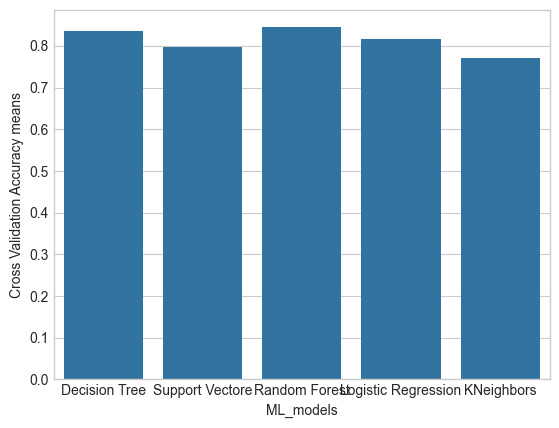

In [313]:
s = sns.barplot(cv_result, x = "ML_models", y = "Cross Validation Accuracy means")

In [315]:
votingc = VotingClassifier(estimators = [("dt", best_estimators[0]),
                                        ("rfc", best_estimators[2]),
                                        ("lr", best_estimators[3])],
                          voting = "soft", n_jobs = -1)
votingc = votingc.fit(X_train, y_train)
print(accuracy_score(votingc.predict(X_test),y_test))

0.8213058419243986
